In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
import pandas as pd
import numpy as np

## Data Preparation and Feature Engineering

In [3]:
weather_df = pd.read_csv('/drive/My Drive/IF5171 Praktikum/Praktikum ANN/weatherAUS.csv')

In [4]:
weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Identify missing values

In [5]:
weather_df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
weather_df.shape

(145460, 23)

### Drop Missing Values

In [8]:
weather_df_na_dropped = weather_df[:].dropna()

In [9]:
weather_df_na_dropped.shape

(56420, 23)

### Data type checking and transformation

In [10]:
weather_df_na_dropped.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [11]:
# Encode columns that have 'object' data type

In [12]:
features_to_encode = list(weather_df_na_dropped.select_dtypes(include = ['object']).columns)
features_to_encode

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [13]:
# Location
loc_unique = weather_df_na_dropped['Location'].unique()
loc_unique = loc_unique.tolist()
loc_d = {}
for idx,val in enumerate(loc_unique):
    loc_d[val]=idx
print(loc_d)
weather_df_na_dropped['Location'] = weather_df_na_dropped['Location'].map(loc_d)

{'Cobar': 0, 'CoffsHarbour': 1, 'Moree': 2, 'NorfolkIsland': 3, 'Sydney': 4, 'SydneyAirport': 5, 'WaggaWagga': 6, 'Williamtown': 7, 'Canberra': 8, 'Sale': 9, 'MelbourneAirport': 10, 'Melbourne': 11, 'Mildura': 12, 'Portland': 13, 'Watsonia': 14, 'Brisbane': 15, 'Cairns': 16, 'Townsville': 17, 'MountGambier': 18, 'Nuriootpa': 19, 'Woomera': 20, 'PerthAirport': 21, 'Perth': 22, 'Hobart': 23, 'AliceSprings': 24, 'Darwin': 25}


In [14]:
# WindGustDir
wgd_unique = weather_df_na_dropped['WindGustDir'].unique()
wgd_unique = wgd_unique.tolist()
wgd_d = {}
for idx,val in enumerate(wgd_unique):
    wgd_d[val]=idx
print(wgd_d)
weather_df_na_dropped['WindGustDir'] = weather_df_na_dropped['WindGustDir'].map(wgd_d)

{'SSW': 0, 'S': 1, 'NNE': 2, 'WNW': 3, 'N': 4, 'SE': 5, 'ENE': 6, 'NE': 7, 'E': 8, 'SW': 9, 'W': 10, 'WSW': 11, 'NNW': 12, 'ESE': 13, 'SSE': 14, 'NW': 15}


In [15]:
# WindDir9am
wd9_unique = weather_df_na_dropped['WindDir9am'].unique()
wd9_unique = wd9_unique.tolist()
wd9_d = {}
for idx,val in enumerate(wd9_unique):
    wd9_d[val]=idx
print(wd9_d)
weather_df_na_dropped['WindDir9am'] = weather_df_na_dropped['WindDir9am'].map(wd9_d)

{'ENE': 0, 'SSE': 1, 'NNE': 2, 'WNW': 3, 'NW': 4, 'N': 5, 'S': 6, 'SE': 7, 'NE': 8, 'W': 9, 'SSW': 10, 'E': 11, 'NNW': 12, 'ESE': 13, 'WSW': 14, 'SW': 15}


In [16]:
# WindDir3pm
wd3_unique = weather_df_na_dropped['WindDir3pm'].unique()
wd3_unique = wd3_unique.tolist()
wd3_d = {}
for idx,val in enumerate(wd3_unique):
    wd3_d[val]=idx
print(wd3_d)
weather_df_na_dropped['WindDir3pm'] = weather_df_na_dropped['WindDir3pm'].map(wd3_d)

{'SW': 0, 'SSE': 1, 'NNW': 2, 'WSW': 3, 'WNW': 4, 'S': 5, 'ENE': 6, 'N': 7, 'SE': 8, 'NNE': 9, 'NW': 10, 'E': 11, 'ESE': 12, 'NE': 13, 'SSW': 14, 'W': 15}


In [17]:
# RainToday
rt_unique = weather_df_na_dropped['RainToday'].unique()
rt_unique = rt_unique.tolist()
rt_d = {}
for idx,val in enumerate(rt_unique):
    rt_d[val]=idx
print(rt_d)
weather_df_na_dropped['RainToday'] = weather_df_na_dropped['RainToday'].map(rt_d)

{'No': 0, 'Yes': 1}


In [18]:
# RainTomorrow
rtm_unique = weather_df_na_dropped['RainTomorrow'].unique()
rtm_unique = rtm_unique.tolist()
rtm_d = {}
for idx,val in enumerate(rtm_unique):
    rtm_d[val]=idx
print(rtm_d)
weather_df_na_dropped['RainTomorrow'] = weather_df_na_dropped['RainTomorrow'].map(rtm_d)

{'No': 0, 'Yes': 1}


### Split dataset to X (independent variables) and y (dependent variable)

In [19]:
attributes = list(weather_df_na_dropped.columns)
features = attributes[:-1]
target = attributes[-1]
print(f"List of features: {features}; target: {target}")

List of features: ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']; target: RainTomorrow


In [20]:
# Drop Date feature
features.remove('Date')

In [21]:
print(f"List of features: {features}; target: {target}")

List of features: ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']; target: RainTomorrow


In [22]:
X = weather_df_na_dropped[features].values
y = weather_df_na_dropped[target].values.flatten()

### Split to train, validation, and test sets

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

### Imbalanced Data Analysis

In [26]:
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

Class=0, n=31622 (77.844517749003%)
Class=1, n=9000 (22.155482250996997%)


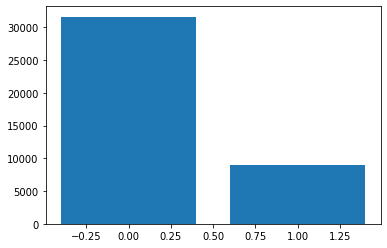

In [27]:
counter = Counter(y_train)
plt.bar(counter.keys(), counter.values())
for k, v in counter.items():
    dist = v/len(y_train) * 100
    print(f"Class={k}, n={v} ({dist}%)")

Bisa dilihat bahwa dataset yang diberikan merupakan imbalanced data. Maka dari itu, resampling akan dilakukan.

#### Resampling with SMOTE

In [28]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Class=0, n=31622 (50.0%)
Class=1, n=31622 (50.0%)


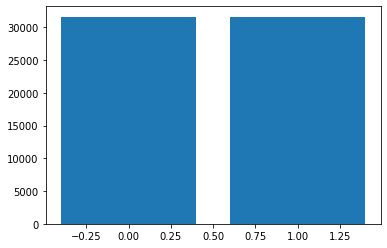

In [29]:
counter = Counter(y_train_smote)
plt.bar(counter.keys(), counter.values())
for k, v in counter.items():
    dist = v/len(y_train_smote) * 100
    print(f"Class={k}, n={v} ({dist}%)")

## Exploratory Data Analysis (EDA)

In [31]:
import seaborn as sns
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [32]:
weather_df_na_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  int64  
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  int64  
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  int64  
 10  WindDir3pm     56420 non-null  int64  
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

### Statistics

In [33]:
weather_df_na_dropped.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,...,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.612141,13.464770,24.219206,2.130397,5.503135,7.735626,7.308206,40.877366,7.357799,7.491989,...,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,0.220879,0.220259
std,7.227951,6.416689,6.970676,7.014822,3.696282,3.758153,4.433184,13.335232,4.573627,4.645965,...,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,0.414843,0.414425
min,0.000000,-6.700000,4.100000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000
25%,7.000000,8.600000,18.700000,0.000000,2.800000,5.000000,4.000000,31.000000,4.000000,4.000000,...,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000,0.000000
50%,14.000000,13.200000,23.900000,0.000000,5.000000,8.600000,7.000000,39.000000,7.000000,7.000000,...,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000,0.000000
75%,20.000000,18.400000,29.700000,0.600000,7.400000,10.700000,11.000000,48.000000,11.000000,12.000000,...,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,0.000000,0.000000
max,25.000000,31.400000,48.100000,206.200000,81.200000,14.500000,15.000000,124.000000,15.000000,15.000000,...,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,1.000000,1.000000


In [34]:
# Correlation Coefficient
def plot_corr_coef(corr_data):
    mask = np.array(corr_data)
    mask[np.tril_indices_from(mask)] = False

    # create appropriate canvas
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)

    sns.heatmap(corr_data, mask=mask, vmax=.8, square=True, annot=True, ax = ax)

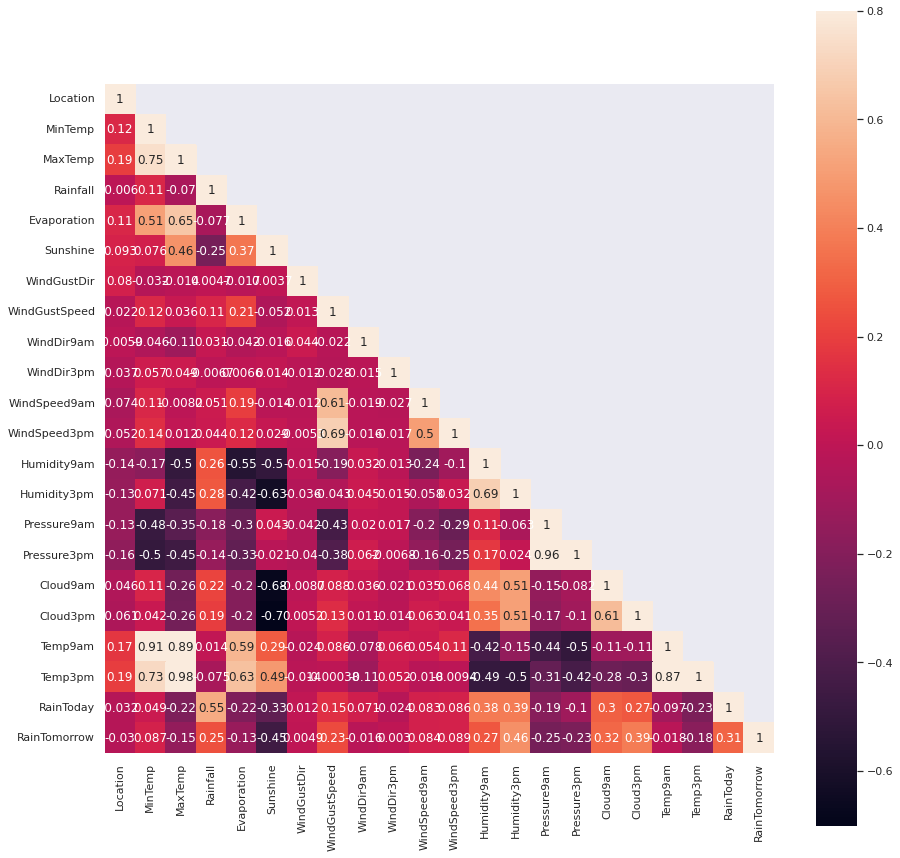

In [35]:
corr_data = weather_df_na_dropped.corr()
plot_corr_coef(corr_data)

In [38]:
corr_coef_to_target = corr_data[['RainTomorrow']]
corr_coef_to_target

,RainTomorrow
Location,-0.029835
MinTemp,0.087428
MaxTemp,-0.147467
Rainfall,0.254342
Evaporation,-0.130002
Sunshine,-0.453407
WindGustDir,0.004890
WindGustSpeed,0.233158
WindDir9am,-0.016293
WindDir3pm,0.002992


In [39]:
corr_coef_to_target = corr_coef_to_target.sort_values(by=['RainTomorrow'])

In [40]:
corr_coef_to_target

,RainTomorrow
Sunshine,-0.453407
Pressure9am,-0.254816
Pressure3pm,-0.230418
Temp3pm,-0.183586
MaxTemp,-0.147467
Evaporation,-0.130002
Location,-0.029835
Temp9am,-0.018179
WindDir9am,-0.016293
WindDir3pm,0.002992


### Visualizations

In [43]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"No": dataframe[dataframe["RainTomorrow"]==0][column],
    "Yes":dataframe[dataframe["RainTomorrow"]==1][column]})
    # Plot the histogram
    temp[["No","Yes"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

### Top 3 Strong Negative Correlated Features and RainTomorrow

In [44]:
strong_negatives = weather_df_na_dropped[['Sunshine', 'Pressure9am', 'Pressure3pm','RainTomorrow']]


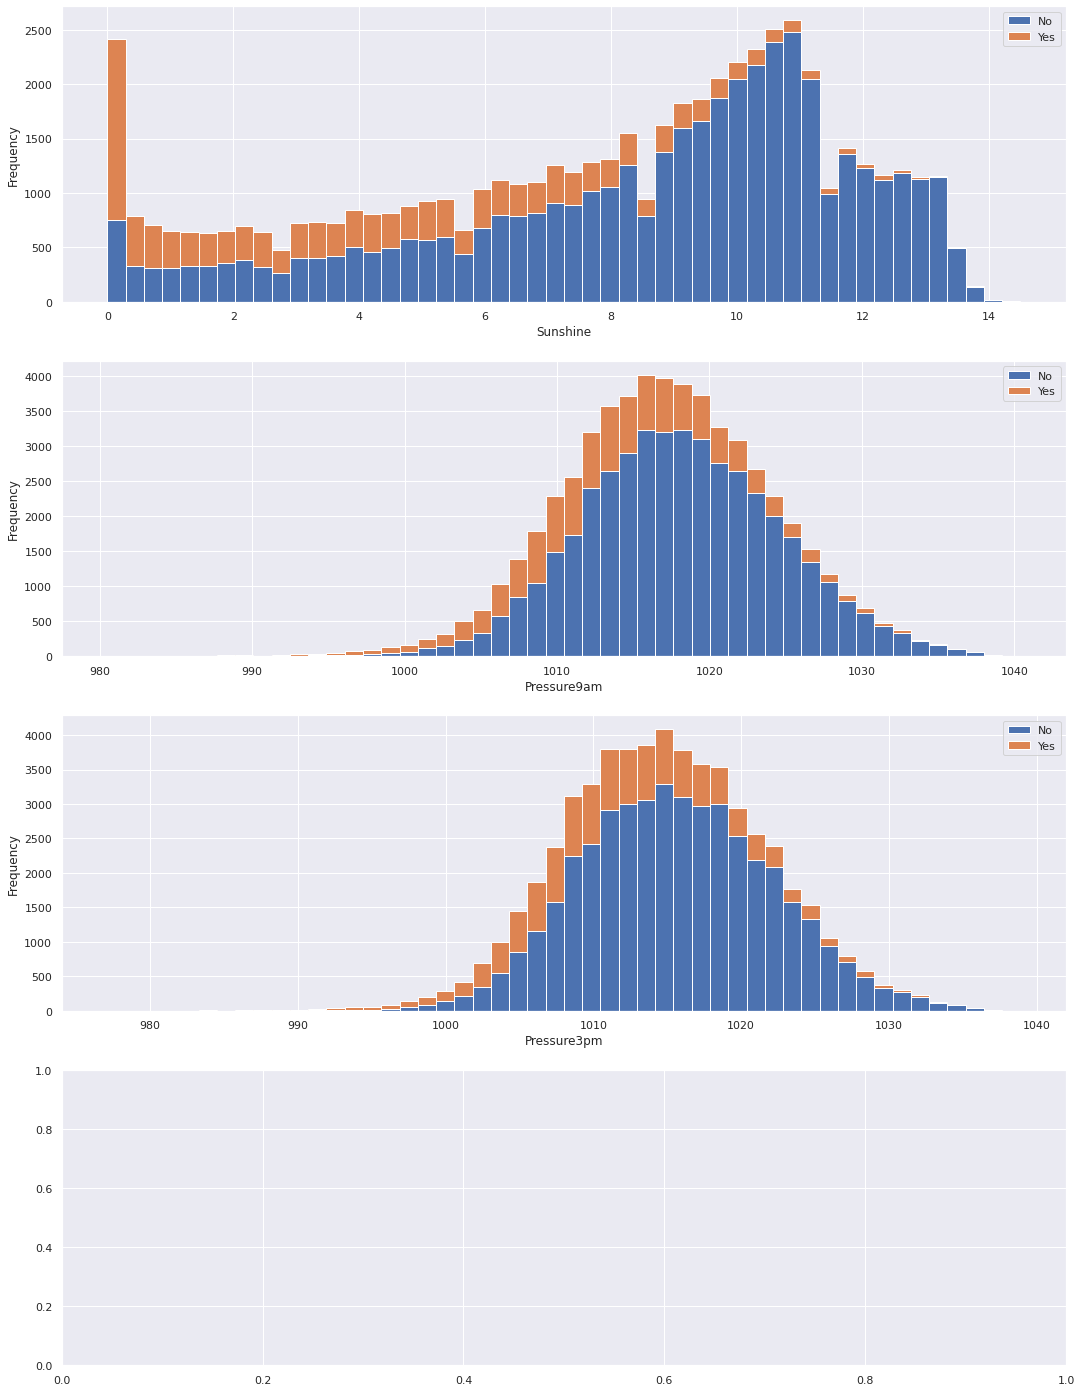

In [45]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(strong_negatives, 'Sunshine', axs[0])
plot_distribution(strong_negatives, 'Pressure9am', axs[1])
plot_distribution(strong_negatives, 'Pressure3pm', axs[2])

Dari dataset, bisa dilihat bahwa observasi-observasi dengan nilai variable Sunshine = 0 memiliki potensi besar terjadinya hujan di keesokan harinya.



### Top 3 Strong Positive Correlated Features and RainTomorrow

In [47]:
strong_positives = weather_df_na_dropped[['Humidity3pm', 'Cloud3pm', 'Cloud9am','RainTomorrow']]


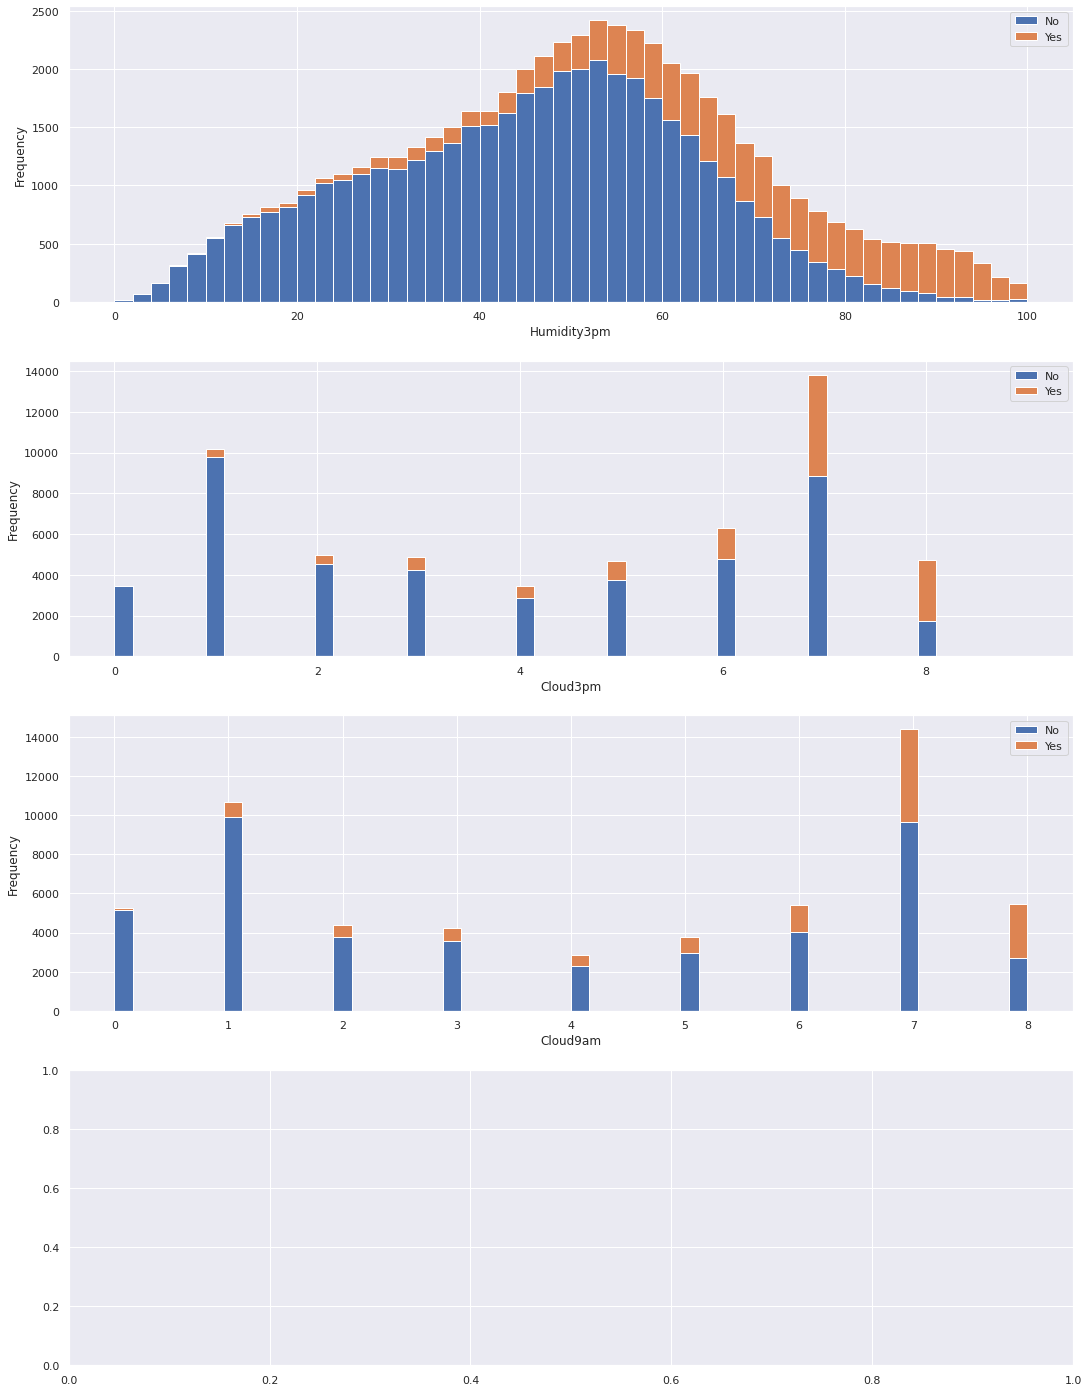

In [48]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(strong_positives, 'Humidity3pm', axs[0])
plot_distribution(strong_positives, 'Cloud3pm', axs[1])
plot_distribution(strong_positives, 'Cloud9am', axs[2])

Berdasarkan data, observasi dengan nilai humidity di pukul 3pm yang tinggi memiliki potensi besar terjadinya hujan dikeesokan harinya.

Begitu juga dengan adanya cloud di pukul 3pm dan 9am, semakin tinggi nilai dari kedua variabel ini, semakin tinggi potensi terjadinya hujan di keesokan hari.

## Modeling - ANN

In [49]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization

In [61]:
len(features)

21

### Model 1
Task: Binary Classification

Arsitektur ANN:
1. 21 unit input
2. 2 hidden layers: (a) h1 => 16 unit dan (b) h2 => 32 unit dengan fungsi aktivasi 'relu'
3. 1 output unit dengan fungsi aktivasi 'sigmoid'

Loss Function:
Binary Crossentropy

Optimizer:
Adam

Train-set:
Not resampled

In [54]:
model1 = Sequential()
model1.add(Dense(16, input_shape=(len(features),), activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
# Summary Model
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                352       
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
history1 = model1.fit(x=X_train, y=y_train, 
                      validation_data=(X_val, y_val),
                      epochs=100, batch_size=1024, verbose=1)

Epoch 1/100
40/40 [==============================] - 1s 9ms/step - loss: 31.0006 - accuracy: 0.5427 - val_loss: 6.5397 - val_accuracy: 0.7791
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 1.8446 - accuracy: 0.6901 - val_loss: 0.7496 - val_accuracy: 0.7625
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6556 - accuracy: 0.7476 - val_loss: 0.5974 - val_accuracy: 0.7641
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5568 - accuracy: 0.7754 - val_loss: 0.5258 - val_accuracy: 0.7802
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5021 - accuracy: 0.7942 - val_loss: 0.4834 - val_accuracy: 0.7913
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4681 - accuracy: 0.8081 - val_loss: 0.4560 - val_accuracy: 0.7997
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4466 - accuracy: 0.8171 - val_loss: 0.4332 - val_accuracy: 0.8135
Epoch 8/100


In [57]:
predictions1 = model1.predict(X_test)

353/353 [==============================] - 1s 2ms/step


#### Evaluation: model1

In [59]:
from sklearn.metrics import classification_report

In [88]:
from sklearn.metrics import confusion_matrix
import itertools

In [60]:
clf_r1 = classification_report(y_test, predictions1.round())
print(clf_r1)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      8854
           1       0.81      0.40      0.54      2430

    accuracy                           0.85     11284
   macro avg       0.83      0.69      0.72     11284
weighted avg       0.85      0.85      0.83     11284



In [89]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[8619  235]
 [1453  977]]


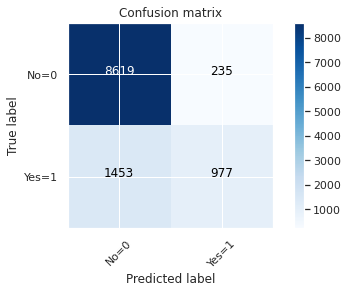

In [90]:
# Compute confusion matrix
cnf_matrix_1 = confusion_matrix(y_test, predictions1.round(), labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_1, classes=['No=0','Yes=1'],normalize= False,  title='Confusion matrix')

### Model 2
Task: Binary Classification

Arsitektur ANN:
1. 10 unit input (Top 5 strong positive correlated features and Top 5 strong negative correlated features)
2. 2 hidden layers: (a) h1 => 16 unit dan (b) h2 => 32 unit dengan fungsi aktivasi 'relu'
3. 1 output unit dengan fungsi aktivasi 'sigmoid'

Loss Function:
Binary Crossentropy

Optimizer:
Adam

Train-set:
SMOTE oversampled with selected features (Top 5 strong positive correlated features and Top 5 strong negative correlated features)

In [63]:
features_sc = ['Sunshine', 'Pressure9am', 'Pressure3pm', 'Temp3pm', 'MaxTemp',
               'Humidity3pm', 'Cloud3pm', 'Cloud9am', 'RainToday', 'Humidity9am']

In [64]:
model2 = Sequential()
model2.add(Dense(16, input_shape=(len(features_sc),), activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
# The data
X_2 = weather_df_na_dropped[features_sc].values
y_2 = weather_df_na_dropped[target].values.flatten()

In [68]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_2, y_2, test_size=0.2, random_state=0)
X_train_sc, X_val_sc, y_train_sc, y_val_sc = train_test_split(X_train_sc, y_train_sc, test_size=0.1, random_state=0)

In [69]:
smote2 = SMOTE()
X_train_sc_smote, y_train_sc_smote = smote.fit_resample(X_train_sc, y_train_sc)

In [73]:
# Modeling
model2 = Sequential()
model2.add(Dense(16, input_shape=(len(features_sc),), activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
print(model2.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                176       
                                                                 
 dense_13 (Dense)            (None, 32)                544       
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________
None


In [75]:
history2 = model2.fit(x=X_train_sc_smote, y=y_train_sc_smote, 
                      validation_data=(X_val_sc, y_val_sc),
                      epochs=100, batch_size=1024, verbose=1)

Epoch 1/100
62/62 [==============================] - 1s 6ms/step - loss: 9.1728 - accuracy: 0.5289 - val_loss: 0.7133 - val_accuracy: 0.7133
Epoch 2/100
62/62 [==============================] - 0s 3ms/step - loss: 0.9537 - accuracy: 0.6221 - val_loss: 0.9186 - val_accuracy: 0.6170
Epoch 3/100
62/62 [==============================] - 0s 3ms/step - loss: 0.8520 - accuracy: 0.6418 - val_loss: 0.8955 - val_accuracy: 0.6032
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 0.7692 - accuracy: 0.6590 - val_loss: 0.6800 - val_accuracy: 0.6726
Epoch 5/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.6808 - val_loss: 0.5192 - val_accuracy: 0.7428
Epoch 6/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6270 - accuracy: 0.6958 - val_loss: 0.4476 - val_accuracy: 0.7922
Epoch 7/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5890 - accuracy: 0.7087 - val_loss: 0.5480 - val_accuracy: 0.7149
Epoch 8/100
6

In [76]:
predictions2 = model2.predict(X_test_sc)

353/353 [==============================] - 1s 3ms/step


#### Evaluation Model 2

In [77]:
clf_r2 = classification_report(y_test_sc, predictions2.round())
print(clf_r2)

              precision    recall  f1-score   support

           0       0.93      0.70      0.80      8854
           1       0.43      0.82      0.56      2430

    accuracy                           0.73     11284
   macro avg       0.68      0.76      0.68     11284
weighted avg       0.82      0.73      0.75     11284



Confusion matrix, without normalization
[[6201 2653]
 [ 448 1982]]


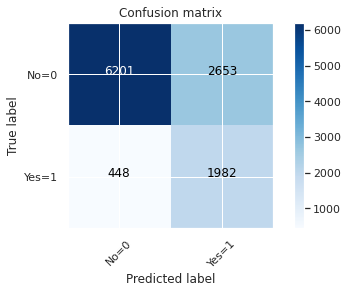

In [91]:
# Compute confusion matrix
cnf_matrix_2 = confusion_matrix(y_test_sc, predictions2.round(), labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_2, classes=['No=0','Yes=1'],normalize= False,  title='Confusion matrix')

### Model 3
Task: Binary Classification

Arsitektur ANN:
1. 21 unit input
2. 2 hidden layers: (a) h1 => 16 unit dan (b) h2 => 32 unit dengan fungsi aktivasi 'relu'
3. 1 output unit dengan fungsi aktivasi 'sigmoid'

Loss Function:
Binary Crossentropy

Optimizer:
Adam

Train-set:
SMOTE oversampled

In [78]:
model3 = Sequential()
model3.add(Dense(16, input_shape=(len(features),), activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
print(model3.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                352       
                                                                 
 dense_16 (Dense)            (None, 32)                544       
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________
None


In [80]:
history3 = model3.fit(x=X_train_smote, y=y_train_smote, 
                      validation_data=(X_val, y_val),
                      epochs=100, batch_size=1024, verbose=1)

Epoch 1/100
62/62 [==============================] - 2s 12ms/step - loss: 56.3651 - accuracy: 0.5075 - val_loss: 3.4175 - val_accuracy: 0.2565
Epoch 2/100
62/62 [==============================] - 1s 8ms/step - loss: 1.0367 - accuracy: 0.5909 - val_loss: 0.8054 - val_accuracy: 0.6225
Epoch 3/100
62/62 [==============================] - 1s 9ms/step - loss: 0.8075 - accuracy: 0.6317 - val_loss: 0.7575 - val_accuracy: 0.6365
Epoch 4/100
62/62 [==============================] - 0s 5ms/step - loss: 0.7177 - accuracy: 0.6625 - val_loss: 0.6699 - val_accuracy: 0.6726
Epoch 5/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6579 - accuracy: 0.6856 - val_loss: 0.5976 - val_accuracy: 0.7067
Epoch 6/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6147 - accuracy: 0.7051 - val_loss: 0.6243 - val_accuracy: 0.6914
Epoch 7/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5839 - accuracy: 0.7192 - val_loss: 0.5485 - val_accuracy: 0.7300
Epoch 8/100

In [81]:
predictions3 = model3.predict(X_test)

353/353 [==============================] - 1s 2ms/step


#### Evaluation: model3

In [82]:
clf_r3 = classification_report(y_test, predictions3.round())
print(clf_r3)

              precision    recall  f1-score   support

           0       0.95      0.71      0.81      8854
           1       0.45      0.88      0.59      2430

    accuracy                           0.74     11284
   macro avg       0.70      0.79      0.70     11284
weighted avg       0.85      0.74      0.76     11284



Confusion matrix, without normalization
[[6245 2609]
 [ 299 2131]]


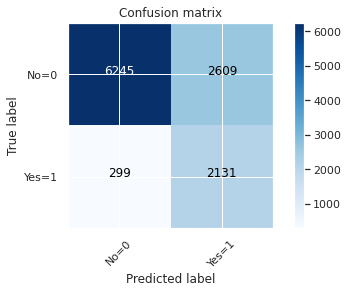

In [92]:
# Compute confusion matrix
cnf_matrix_3 = confusion_matrix(y_test, predictions3.round(), labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_3, classes=['No=0','Yes=1'],normalize= False,  title='Confusion matrix')

### Thoughts: model1 performed the best so far
Model 1 dengan arsitektur ANN:
1. 21 unit input: Semua fitur digunakan kecuali Date dan fitur dengan type object di-encode menjadi numerikal type.
2. 2 hidden layers: (a) h1 => 16 unit dan (b) 32 unit dengan fungsi aktivasi 'relu'
3. 1 ouput unit dengan fungsi aktivasi 'sigmoid'

Loss function: Binary Crossentropy

Optimizer: Adam

Train-set: Not resampled

Memberikan performa terbaik terhadap test set dengan f1-score macro average sebesar 0.72. 

#### Hidden layers: 2 hidden layers
Hidden layer digunakan agar data menjadi *linearly separable* antar kelas Yes (1) dan No (0), dengan menghasilkan *best decision boundary*. Dengan menambahkan 2 hidden layers pada arsitektur ANN model1 dan dengan 16 dan 32 unit untuk setiap layer-nya, didapatkan f1-score macro average sebesar 72%. Eksperimen lanjutan bisa dilanjutkan dengan melakukan modifikasi terhadap jumlah hidden layer (Dense) pada arsitektur, termasuk jumlah unit untuk setiap layer.

#### Train-set: imbalanced dataset
Pada model1, train-set yang digunakan merupakan set yang tidak balance antar kelas 0 dan kelas 1. Persentase data train dengan label 0 yaitu sebanyak ~77%. Namun, dengan menggunakan f1-score macro average sebagai metrik evaluasi utama dalam menentukan model terbaik, ini bisa meng-*capture* fenomena imbalanced dataset yang digunakan sebagai data latih karena metrik ini tidak mengistimewakan suatu kelas.

In [95]:
def plot_acc_epoch(epochs, train_acc, val_acc):
    l = range(1,epochs+1)
    N = len(l)
    l2 = np.arange(N)
    plt.subplots(figsize=(10, 5))
    plt.plot(l2, val_acc, label="Validation Accuracy")
    plt.plot(l2, train_acc, label="Training Accuracy")
    plt.xticks(l2,l)
    plt.grid(True)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title('Accuracy versus Epoch', fontsize=12)
    plt.show()

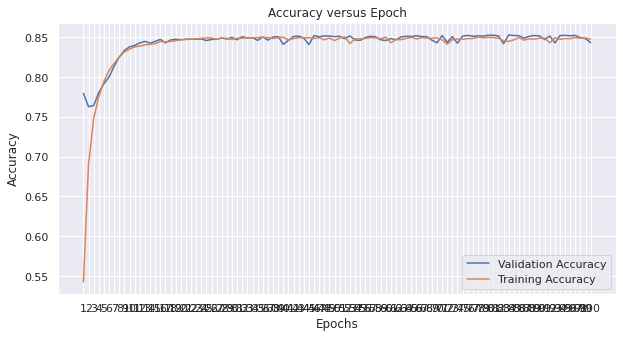

In [96]:
plot_acc_epoch(100, history1.history['accuracy'], history1.history['val_accuracy'])